In [63]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [64]:
def connect():
    #parameter format for local use
    params = {
    'dbname':'hmda',
    'user':'fureym',
    'password':'',
    'host':'localhost',}
    #connect_string = "dbname=%s user=%s host=%s password =%s" %(dbname, user, host, password) #set a string for connection to SQL
    try:
        conn = psycopg2.connect(**params)
        #return conn.cursor(cursor_factory=psycopg2.extras.DictCursor) #return a dictionary cursor object
        return conn.cursor()
    except psycopg2.Error as e: #if database connection results in an error print the following
        print("I am unable to connect to the database: ", e)

In [65]:
connect()

<cursor object at 0x10c099428; closed: 0>

In [87]:
#Defining a file analysis function that passes in a SQL command file and a year.  
def file_analysis(sql, year, xcolumn, ycolumn):
    sql_base = ""
    with open(sql) as in_sql:
        for line in in_sql.readlines():
            sql_base = sql_base + line.strip("\n")
            sql_base=sql_base.format(year=year)
    cur = connect()
    cur.execute(sql_base)
    data = cur.fetchall()
    data_dict = {xcolumn: data[0][0],
                ycolumn:data[0][1]}
    return data_dict

#Defining a date iteration function that passes in a SQL command file as a string 
#and two years for a range of dates.
def date_iteration(sql, d1, d2, xcolumn, ycolumn):
    dates = list(range(d1, (d2+1)))
    analysis_list = []
    for date in dates:
        analysis_list.append(file_analysis(sql, date, xcolumn, ycolumn))
    analysis_df = pd.DataFrame(analysis_list)
    analysis_df = analysis_df[[xcolumn, ycolumn]]
    return analysis_df

#Defining a function that creates a bar chart and an an accompanying table of values
#bar chart function that passes in a SQL command file as a string,
#two years for a range of dates, a title for the chart, an x-title, a ytitle, and a color. 
def time_line_chart(sql, d1, d2, xcolumn, ycolumn, title, color):
    analysis_df = date_iteration(sql, d1, d2, xcolumn, ycolumn)
    x = analysis_df[xcolumn]
    y = analysis_df[ycolumn]
    plt.plot(x, y, color = color)
    plt.title(title)
    plt.xlabel(xcolumn)
    plt.ylabel(ycolumn)
    plt.xticks = x

#Defining a function that creates a bar chart and an an accompanying table of values
#bar chart function that passes in a SQL command file as a string,
#two years for a range of dates, a title for the chart, an x-title, a ytitle, and a color. 
def time_bar_chart(sql, d1, d2, xcolumn, ycolumn, title, color):
#Creates an accompanying table with commas between numbers.     
    analysis_df = date_iteration(sql, d1, d2, xcolumn, ycolumn)
    x = analysis_df[xcolumn]
    y = analysis_df[ycolumn]
    plt.bar(x, y, color = color)
    plt.title(title)
    plt.xlabel(xcolumn)
    plt.ylabel(ycolumn)
    plt.xticks = x
    return plt.show()

def chart_table(sql, d1, d2, xcolumn, ycolumn):
    analysis_df = date_iteration(sql, d1, d2, xcolumn, ycolumn)
    analysis_df[ycolumn] = analysis_df.apply(lambda x: "{:,}".format(x[ycolumn]), axis=1)
    return display(analysis_df.head(20))





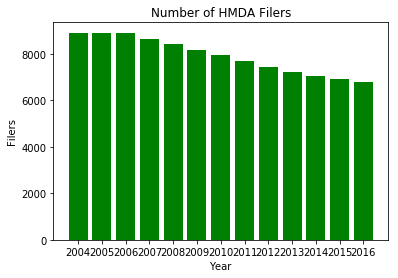

,Year,Filers
0,2004,"8,871"
1,2005,"8,873"
2,2006,"8,902"
3,2007,"8,636"
4,2008,"8,422"
5,2009,"8,151"
6,2010,"7,952"
7,2011,"7,676"
8,2012,"7,435"
9,2013,"7,214"


In [88]:
time_bar_chart("time_series/filer_count.sql", 2004, 2016, 'Year', "Filers", 'Number of HMDA Filers', 'green')
chart_table("time_series/filer_count.sql", 2004, 2016, 'Year', "Filers")